Testing with bandwidth: 2.0 MHz
Current Mean (I-Mon): -0.200 A
Current Standard Deviation (I-Mon): 0.000 A
Testing with bandwidth: 4.0 MHz
Current Mean (I-Mon): -0.200 A
Current Standard Deviation (I-Mon): 0.000 A
Testing with bandwidth: 6.0 MHz
Current Mean (I-Mon): -0.200 A
Current Standard Deviation (I-Mon): 0.000 A
Testing with bandwidth: 8.0 MHz
Current Mean (I-Mon): -0.199 A
Current Standard Deviation (I-Mon): 0.000 A
Testing with bandwidth: 10.0 MHz
Current Mean (I-Mon): -0.199 A
Current Standard Deviation (I-Mon): 0.000 A


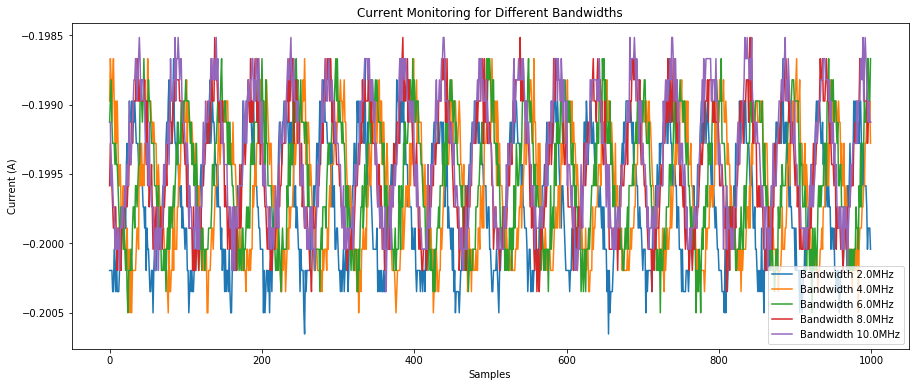

In [19]:
#Checking the noisy current depend on the bandwidth with gen.write(f'SOUR1:BWID {bandwidth}') which is not good

import numpy as np
import nidaqmx
import time
import pyvisa as visa
import matplotlib.pyplot as plt
import pandas as pd

# Setup Noise Generator RigolDG1022
rm = visa.ResourceManager()
gen = rm.open_resource(r'USB0::0x1AB1::0x0642::DG1ZA241701602::INSTR')
gen.write('*RST')
gen.write('OUTPut1:STATe On')

# Define bandwidth ranges
bandwidth_ranges = np.linspace(2e6, 10e6, 5)  # From 200 kHz to 10 MHz
df = pd.DataFrame()
 # Set the generator to produce a noise waveform
with nidaqmx.Task() as send_current:
    send_current.ai_channels.add_ai_voltage_chan("Dev4/ai7")
    send_current.timing.cfg_samp_clk_timing(rate=50000)  # rate=  analog signal to digital form. 50 kHz = 50,000 samples of the input signal every second.50 KHz sample rate
    for bandwidth in bandwidth_ranges:
        gen.write(f'SOUR1:BWID {bandwidth}')  #  Set the generator to produce a noise waveform and Attempt to set it for different bandwidth (may not be valid for DG1022)
        print(f"Testing with bandwidth: {bandwidth/1e6} MHz")  # Print the bandwidth being tested
        time.sleep(1)  # Allow some time for the system to stabilize

        current_data = send_current.read(number_of_samples_per_channel=20000)
        df[f'{bandwidth/1e6}MHz'] = current_data

        current_std = np.std(current_data)
        print(f'Current Mean (I-Mon): {np.mean(current_data):.3f} A')
        print(f'Current Standard Deviation (I-Mon): {current_std:.3f} A')

gen.write('OUTPut1:STATe Off')
gen.close()

# Plotting
plt.figure(figsize=(15, 6))
for column in df.columns:
    plt.plot(df[column], label=f'Bandwidth {column}')
plt.title('Current Monitoring for Different Bandwidths')
plt.legend()
plt.xlabel('Samples')
plt.ylabel('Current (A)')
plt.show()


Testing with bandwidth: 2.0 MHz
Bandwidth: 2.0 MHz - Current Mean: -0.200 A, Current Std Dev: 0.001 A
Testing with bandwidth: 6.5 MHz
Bandwidth: 6.5 MHz - Current Mean: -0.200 A, Current Std Dev: 0.001 A
Testing with bandwidth: 11.0 MHz
Bandwidth: 11.0 MHz - Current Mean: -0.200 A, Current Std Dev: 0.001 A
Testing with bandwidth: 15.5 MHz
Bandwidth: 15.5 MHz - Current Mean: -0.200 A, Current Std Dev: 0.001 A
Testing with bandwidth: 20.0 MHz
Bandwidth: 20.0 MHz - Current Mean: -0.200 A, Current Std Dev: 0.001 A


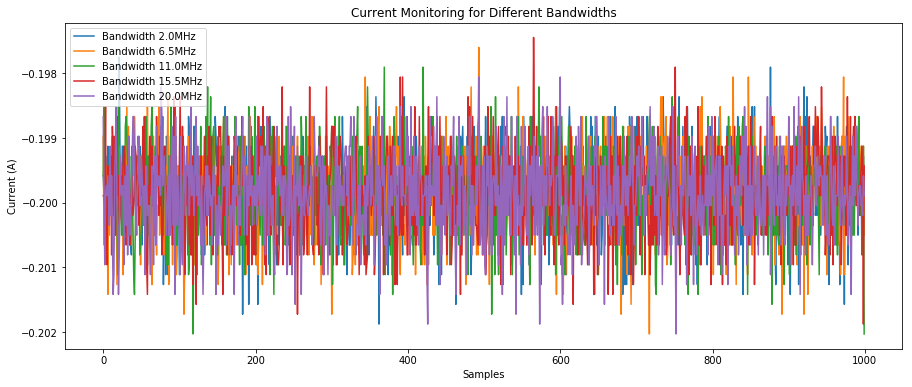

In [20]:
#Checking the noisy current depend on the bandwidth with gen.write('FUNCtion NOIS')) which seems  good


import numpy as np
import nidaqmx
import time
import pyvisa as visa
import matplotlib.pyplot as plt
import pandas as pd

# Setup Noise Generator
rm = visa.ResourceManager()
gen = rm.open_resource(r'USB0::0x1AB1::0x0642::DG1ZA241701602::INSTR')
gen.write('*RST')
gen.write('OUTPut1:STATe On')
gen.write('FUNCtion NOIS')  # Set the generator to produce a noise waveform for each bandwidth

# Define bandwidth ranges (these are placeholders for your filter settings)
bandwidth_ranges = np.linspace(2e6, 20e6, 5)  # From 200 kHz to 20 MHz
df = pd.DataFrame()

with nidaqmx.Task() as send_current:
    send_current.ai_channels.add_ai_voltage_chan("Dev4/ai7")
    send_current.timing.cfg_samp_clk_timing(rate=50000)   # rate=  analog signal to digital form. 50 kHz = 50,000 samples of the input signal every second.50 KHz sample rate

    for bandwidth in bandwidth_ranges:
        # Adjust your external filter to the desired bandwidth here
        print(f"Testing with bandwidth: {bandwidth/1e6} MHz")
        time.sleep(1)  # Allow some time for the system to stabilize

        current_data = send_current.read(number_of_samples_per_channel=20000)
        df[f'{bandwidth/1e6}MHz'] = current_data

        current_mean = np.mean(current_data)
        current_std = np.std(current_data)
        print(f'Bandwidth: {bandwidth/1e6} MHz - Current Mean: {current_mean:.3f} A, Current Std Dev: {current_std:.3f} A')

gen.write('OUTPut1:STATe Off')
gen.close()

# Plotting
plt.figure(figsize=(15, 6))
for column in df.columns:
    plt.plot(df[column], label=f'Bandwidth {column}')
plt.title('Current Monitoring for Different Bandwidths')
plt.legend()
plt.xlabel('Samples')
plt.ylabel('Current (A)')
plt.show()



#andwidth in bandwidth_ranges: This represents the range of frequencies over which your system (probably a filter connected to the noise generator) is operating. The bandwidth is a measure of the width of a range of frequencies. In your script, you are varying the bandwidth from 2 MHz to 20 MHz, which means you are testing how the system behaves when it allows different ranges of frequencies to pass through. This is crucial in noise analysis because the characteristics of the noise can vary significantly with different frequency ranges.
#Sampling Rate in send_current.timing.cfg_samp_clk_timing(rate=50000): This is the rate at which your data acquisition system (DAQ) samples the analog signal to convert it into digital form. The sampling rate of 50 kHz means that the DAQ system is taking 50,000 samples of the input signal every second. This parameter is critical for accurately capturing the waveform of the signal you are measuring. According to the Nyquist theorem, the sampling rate should be at least twice the highest frequency in the signal to accurately reconstruct the signal. In your case, the sampling rate needs to be high enough to capture the details of the noise signal within the set bandwidth range.
#In summary, the bandwidth determines the range of frequencies you are analyzing in your signal, while the sampling rate determines how often the signal is sampled for digital analysis. Both are related to frequency but are used for different aspects of signal processing in your experiment.

Bandwidth: 0.2 MHz - Current Mean: -0.201 A, Current Std Dev: 0.001 A
Bandwidth: 5.15 MHz - Current Mean: -0.201 A, Current Std Dev: 0.001 A
Bandwidth: 10.1 MHz - Current Mean: -0.201 A, Current Std Dev: 0.001 A
Bandwidth: 15.05 MHz - Current Mean: -0.201 A, Current Std Dev: 0.001 A
Bandwidth: 20.0 MHz - Current Mean: -0.201 A, Current Std Dev: 0.001 A


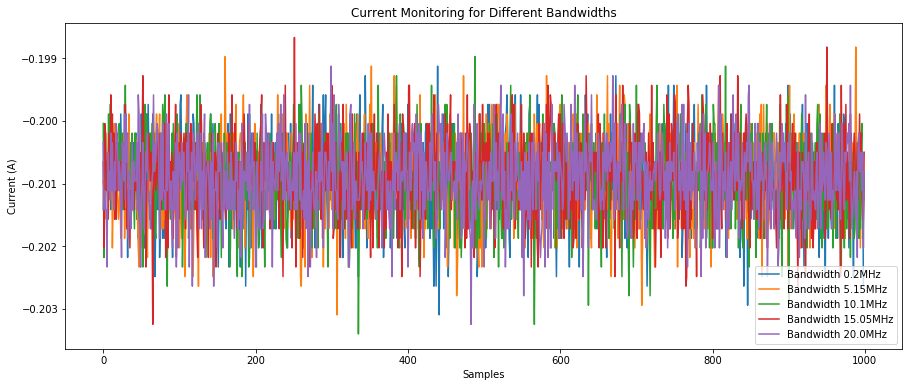

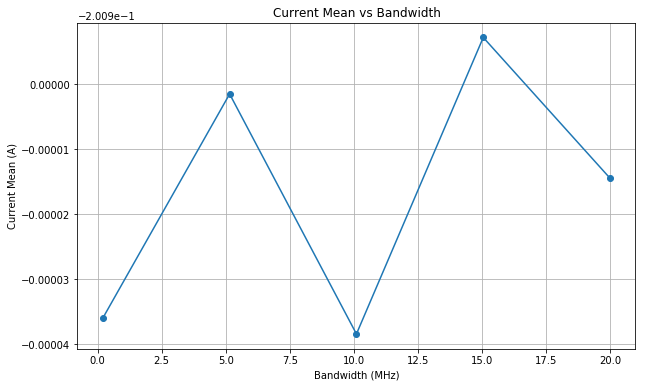

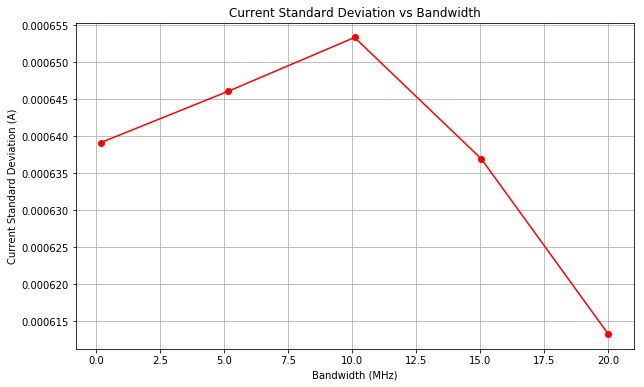

In [17]:
#Checking the current depend on the bandwidth with gen.write('FUNCtion NOIS')) which seems  good
#plus current_mean and current_std depend on bandwidth

import numpy as np
import nidaqmx
import time
import pyvisa as visa
import matplotlib.pyplot as plt
import pandas as pd

# Setup Noise Generator
rm = visa.ResourceManager()
gen = rm.open_resource(r'USB0::0x1AB1::0x0642::DG1ZA241701602::INSTR')
gen.write('*RST')
gen.write('OUTPut1:STATe On')
gen.write('FUNCtion NOIS')  # Set the generator to produce a noise waveform

# Define bandwidth ranges (these are placeholders for your filter settings)
bandwidth_ranges = np.linspace(200e3, 20e6, 5)  # From 200 kHz to 20 MHz
df = pd.DataFrame()

# Lists to store mean and std dev for plotting
mean_values = []
std_dev_values = []
bandwidth_values = []

with nidaqmx.Task() as send_current:
    send_current.ai_channels.add_ai_voltage_chan("Dev4/ai7")
    send_current.timing.cfg_samp_clk_timing(rate=50000)   # rate=  analog signal to digital form. 50 kHz = 50,000 samples of the input signal every second.50 KHz sample rate

    for bandwidth in bandwidth_ranges:
        #print(f"Testing with bandwidth: {bandwidth/1e6} MHz")
        time.sleep(1)  # Allow time for stabilization

        current_data = send_current.read(number_of_samples_per_channel=20000)
        df[f'{bandwidth/1e6}MHz'] = current_data

        current_mean = np.mean(current_data)
        current_std = np.std(current_data)

        # Store results for plotting
        mean_values.append(current_mean)
        std_dev_values.append(current_std)
        bandwidth_values.append(bandwidth/1e6)

        # Print mean and std dev values for each bandwidth
        print(f"Bandwidth: {bandwidth/1e6} MHz - Current Mean: {current_mean:.3f} A, Current Std Dev: {current_std:.3f} A")

# Turn off Noise Generator
gen.write('OUTPut1:STATe Off')
gen.close()

# Plotting Current Data for Different Bandwidths
plt.figure(figsize=(15, 6))
for column in df.columns:
    plt.plot(df[column], label=f'Bandwidth {column}')
plt.title('Current Monitoring for Different Bandwidths')
plt.legend()
plt.xlabel('Samples')
plt.ylabel('Current (A)')
plt.show()

# Plotting Current Mean vs Bandwidth
plt.figure(figsize=(10, 6))
plt.plot(bandwidth_values, mean_values, marker='o')
plt.title('Current Mean vs Bandwidth')
plt.xlabel('Bandwidth (MHz)')
plt.ylabel('Current Mean (A)')
plt.grid()
plt.show()

# Plotting Current Standard Deviation vs Bandwidth
plt.figure(figsize=(10, 6))
plt.plot(bandwidth_values, std_dev_values, marker='o', color='red')
plt.title('Current Standard Deviation vs Bandwidth')
plt.xlabel('Bandwidth (MHz)')
plt.ylabel('Current Standard Deviation (A)')
plt.grid()
plt.show()


Testing with amplitude: 0.1 V
Amplitude: 0.1 V - Current Mean: -0.201 A, Current Std Dev: 0.000 A
Testing with amplitude: 0.825 V
Amplitude: 0.825 V - Current Mean: -0.201 A, Current Std Dev: 0.000 A
Testing with amplitude: 1.55 V
Amplitude: 1.55 V - Current Mean: -0.201 A, Current Std Dev: 0.000 A
Testing with amplitude: 2.275 V
Amplitude: 2.275 V - Current Mean: -0.201 A, Current Std Dev: 0.000 A
Testing with amplitude: 3.0 V
Amplitude: 3.0 V - Current Mean: -0.201 A, Current Std Dev: 0.000 A


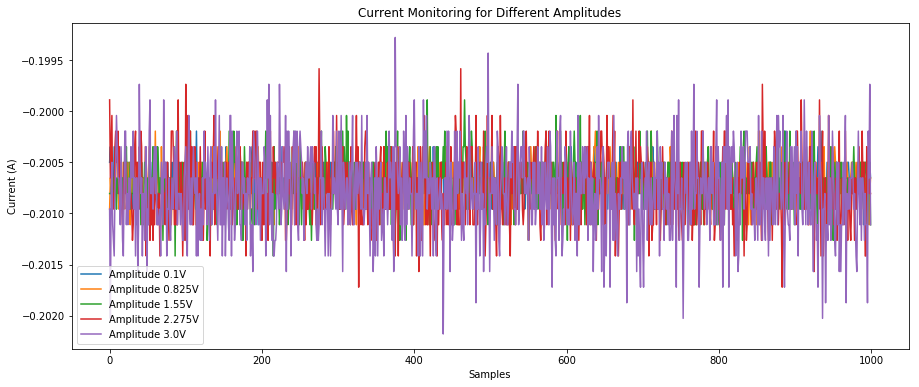

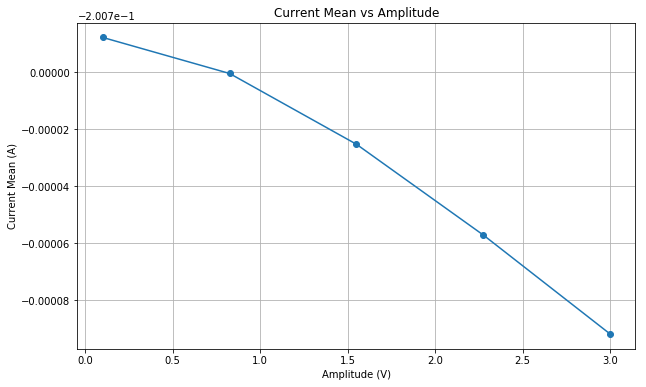

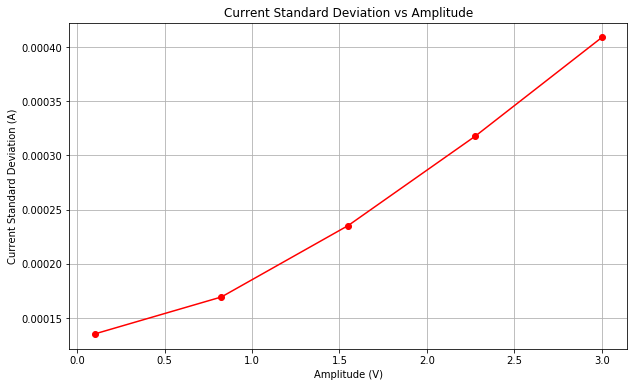

In [28]:
#Checking the current depend on the amplitude with gen.write('FUNCtion NOIS')) which seems good
#plus current_mean and current_std depend on bandwidth


import numpy as np
import nidaqmx
import time
import pyvisa as visa
import matplotlib.pyplot as plt
import pandas as pd

# Setup Noise Generator
rm = visa.ResourceManager()
gen = rm.open_resource(r'USB0::0x1AB1::0x0642::DG1ZA241701602::INSTR')
gen.write('*RST')
gen.write('OUTPut1:STATe On')
gen.write('FUNCtion NOIS')  # Set the generator to produce a noise waveform

# Define amplitude ranges (these are placeholders for your amplitude settings)
amplitude_ranges = np.linspace(0.1, 3, 5)  # Example: From 0.1V to 5V
df = pd.DataFrame()

# Lists to store mean and std dev for plotting
mean_values = []
std_dev_values = []
amplitude_values = []

with nidaqmx.Task() as send_current:
    send_current.ai_channels.add_ai_voltage_chan("Dev4/ai7")
    send_current.timing.cfg_samp_clk_timing(rate=50000)   # rate=  analog signal to digital form. 50 kHz means = 50,000 samples of the input signal every second.50 KHz sample rate

    for amplitude in amplitude_ranges:
        # Set the amplitude of the noise generator
        gen.write(f'VOLTage {amplitude}')
        
        print(f"Testing with amplitude: {amplitude} V")
        time.sleep(1)  # Allow time for stabilization

        current_data = send_current.read(number_of_samples_per_channel=20000)
        df[f'{amplitude}V'] = current_data

        current_mean = np.mean(current_data)
        current_std = np.std(current_data)

        # Store results for plotting
        mean_values.append(current_mean)
        std_dev_values.append(current_std)
        amplitude_values.append(amplitude)

        # Print mean and std dev values for each amplitude
        print(f"Amplitude: {amplitude} V - Current Mean: {current_mean:.3f} A, Current Std Dev: {current_std:.3f} A")

# Turn off Noise Generator
gen.write('OUTPut1:STATe Off')
gen.close()

# Plotting Current Data for Different Amplitudes
plt.figure(figsize=(15, 6))
for column in df.columns:
    plt.plot(df[column], label=f'Amplitude {column}')
plt.title('Current Monitoring for Different Amplitudes')
plt.legend()
plt.xlabel('Samples')
plt.ylabel('Current (A)')
plt.show()

# Plotting Current Mean vs Amplitude
plt.figure(figsize=(10, 6))
plt.plot(amplitude_values, mean_values, marker='o')
plt.title('Current Mean vs Amplitude')
plt.xlabel('Amplitude (V)')
plt.ylabel('Current Mean (A)')
plt.grid()
plt.show()

# Plotting Current Standard Deviation vs Amplitude
plt.figure(figsize=(10, 6))
plt.plot(amplitude_values, std_dev_values, marker='o', color='red')
plt.title('Current Standard Deviation vs Amplitude')
plt.xlabel('Amplitude (V)')
plt.ylabel('Current Standard Deviation (A)')
plt.grid()
plt.show()


Testing with amplitude: 0.1 V
Amplitude: 0.1 V - Current Mean: -0.201 A, Current Std Dev: 0.000 A
Testing with amplitude: 1.3250000000000002 V
Amplitude: 1.3250000000000002 V - Current Mean: -0.201 A, Current Std Dev: 0.000 A
Testing with amplitude: 2.5500000000000003 V
Amplitude: 2.5500000000000003 V - Current Mean: -0.201 A, Current Std Dev: 0.000 A
Testing with amplitude: 3.7750000000000004 V
Amplitude: 3.7750000000000004 V - Current Mean: -0.201 A, Current Std Dev: 0.000 A
Testing with amplitude: 5.0 V
Amplitude: 5.0 V - Current Mean: -0.201 A, Current Std Dev: 0.001 A


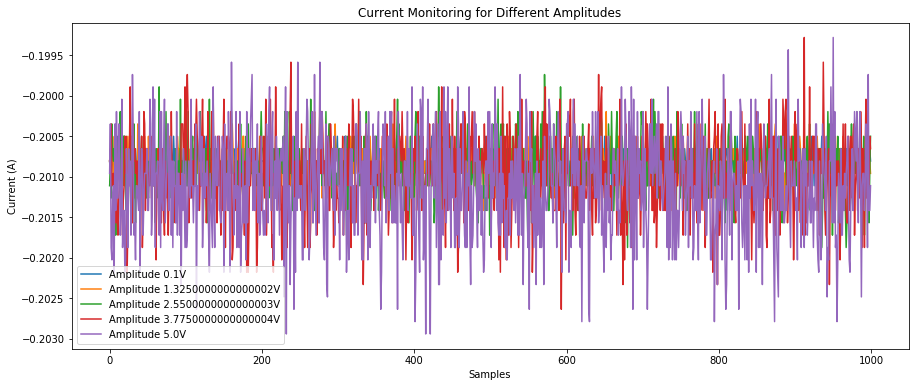

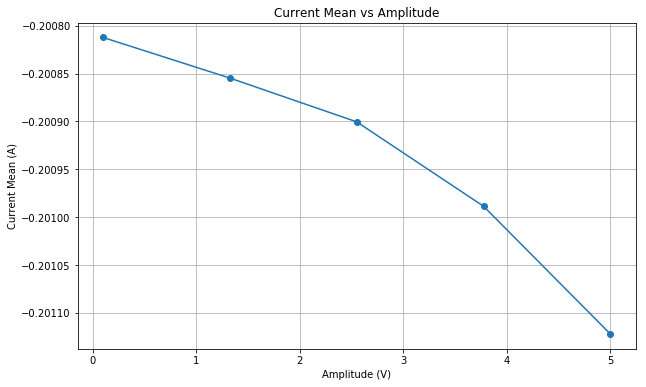

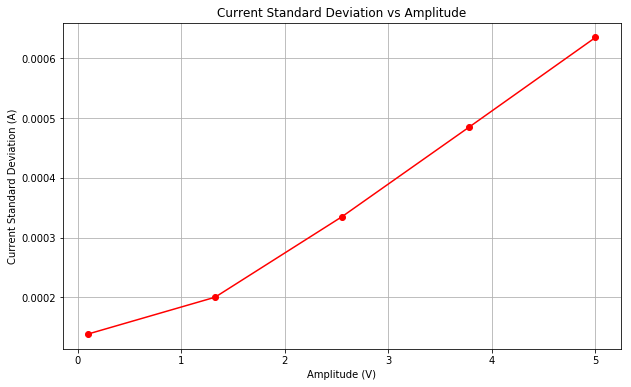

In [34]:
#Checking the current depend on the amplitude with  gen.write(f'SOUR1:APPL:NOIS {amplitude}')which to be same.
#plus current_mean and current_std depend on bandwidth


import numpy as np
import nidaqmx
import time
import pyvisa as visa
import matplotlib.pyplot as plt
import pandas as pd

# Setup Noise Generator
rm = visa.ResourceManager()
gen = rm.open_resource(r'USB0::0x1AB1::0x0642::DG1ZA241701602::INSTR')
gen.write('*RST')
gen.write('OUTPut1:STATe On')

# Define amplitude ranges (these are placeholders for your amplitude settings)
amplitude_ranges = np.linspace(0.1, 5, 5)  # Example: From 0.1V to 5V
df = pd.DataFrame()

# Lists to store mean and std dev for plotting
mean_values = []
std_dev_values = []
amplitude_values = []

with nidaqmx.Task() as send_current:
    send_current.ai_channels.add_ai_voltage_chan("Dev4/ai7")
    send_current.timing.cfg_samp_clk_timing(rate=50000)   # rate=  analog signal to digital form. 50 kHz = 50,000 samples of the input signal every second.50 KHz sample rate

    for amplitude in amplitude_ranges:
        # Set the amplitude of the noise generator
        gen.write(f'SOUR1:APPL:NOIS {amplitude}')
        
        print(f"Testing with amplitude: {amplitude} V")
        time.sleep(1)  # Allow time for stabilization

        current_data = send_current.read(number_of_samples_per_channel=20000)
        df[f'{amplitude}V'] = current_data

        current_mean = np.mean(current_data)
        current_std = np.std(current_data)

        # Store results for plotting
        mean_values.append(current_mean)
        std_dev_values.append(current_std)
        amplitude_values.append(amplitude)

        # Print mean and std dev values for each amplitude
        print(f"Amplitude: {amplitude} V - Current Mean: {current_mean:.3f} A, Current Std Dev: {current_std:.3f} A")

# Turn off Noise Generator
gen.write('OUTPut1:STATe Off')
gen.close()

# Plotting Current Data for Different Amplitudes
plt.figure(figsize=(15, 6))
for column in df.columns:
    plt.plot(df[column], label=f'Amplitude {column}')
plt.title('Current Monitoring for Different Amplitudes')
plt.legend()
plt.xlabel('Samples')
plt.ylabel('Current (A)')
plt.show()

# Plotting Current Mean vs Amplitude
plt.figure(figsize=(10, 6))
plt.plot(amplitude_values, mean_values, marker='o')
plt.title('Current Mean vs Amplitude')
plt.xlabel('Amplitude (V)')
plt.ylabel('Current Mean (A)')
plt.grid()
plt.show()

# Plotting Current Standard Deviation vs Amplitude
plt.figure(figsize=(10, 6))
plt.plot(amplitude_values, std_dev_values, marker='o', color='red')
plt.title('Current Standard Deviation vs Amplitude')
plt.xlabel('Amplitude (V)')
plt.ylabel('Current Standard Deviation (A)')
plt.grid()
plt.show()
